In [27]:
import keras
keras.__version__

'2.2.5'

In [0]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import optimizers

In [0]:


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [30]:
print('Training data')
print('Shape of train_images:' ,train_images.shape)
print('Shape of train_labels:' ,train_labels.shape)
print('Shape of test_images:' ,test_images.shape)
print('Shape of test_labels:', test_labels.shape)


Training data
Shape of train_images: (50000, 32, 32, 3)
Shape of train_labels: (50000, 1)
Shape of test_images: (10000, 32, 32, 3)
Shape of test_labels: (10000, 1)


In [0]:

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:


model = models.Sequential()
model.add(layers.Conv2D(512, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 512)       14336     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 512)       2359808   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 512)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 1024)      4719616   
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 1024)      9438208   
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 1024)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 25600)            

In [0]:


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
from keras.callbacks import Callback, ModelCheckpoint

checkpoint = ModelCheckpoint(
    'cipher_decay512CCM.h5', 
    monitor='val_acc', 
    verbose=0, 
    save_best_only=True, 
    save_weights_only=False
    
)


In [36]:
history = model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_split=0.2,  callbacks=[checkpoint])

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 204s 5ms/step - loss: 1.5780 - acc: 0.4314 - val_loss: 1.3362 - val_acc: 0.5265
Epoch 2/25
40000/40000 [==============================] - 203s 5ms/step - loss: 1.0761 - acc: 0.6245 - val_loss: 0.9424 - val_acc: 0.6733
Epoch 3/25
40000/40000 [==============================] - 203s 5ms/step - loss: 0.8274 - acc: 0.7165 - val_loss: 0.8491 - val_acc: 0.7059
Epoch 4/25
40000/40000 [==============================] - 203s 5ms/step - loss: 0.6554 - acc: 0.7743 - val_loss: 0.7149 - val_acc: 0.7550
Epoch 5/25
40000/40000 [==============================] - 203s 5ms/step - loss: 0.5077 - acc: 0.8267 - val_loss: 0.7217 - val_acc: 0.7602
Epoch 6/25
40000/40000 [==============================] - 204s 5ms/step - loss: 0.3801 - acc: 0.8701 - val_loss: 0.6998 - val_acc: 0.7782
Epoch 7/25
40000/40000 [==============================] - 204s 5ms/step - loss: 0.2632 - acc: 0.9088 - val_loss: 0.6835 - 

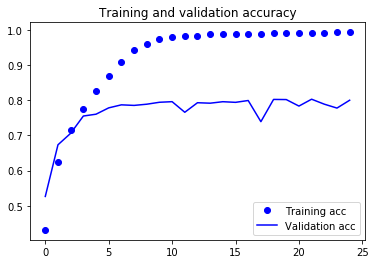

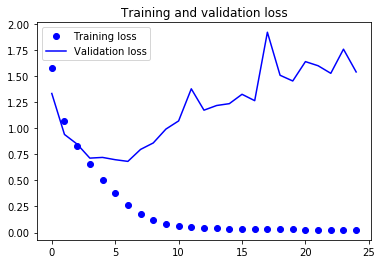

In [37]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model = keras.models.load_model('cipher_decay512CCM.h5')

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 19s 2ms/step


In [40]:
test_acc

0.7906

In [41]:
test_loss

1.7249849173307419

In [42]:

import numpy as np
yActualVal=np.argmax(test_labels,axis=1)
yActualVal

array([3, 8, 8, ..., 5, 1, 7])

In [43]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

yPredictedVal = model.predict_classes(test_images)
yPredictedVal

array([3, 8, 8, ..., 5, 1, 7])

In [44]:
print(classification_report(y_true=yActualVal, y_pred=yPredictedVal))


              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1000
           1       0.86      0.92      0.89      1000
           2       0.72      0.71      0.71      1000
           3       0.63      0.58      0.61      1000
           4       0.80      0.71      0.76      1000
           5       0.67      0.73      0.70      1000
           6       0.80      0.89      0.84      1000
           7       0.80      0.86      0.83      1000
           8       0.87      0.88      0.87      1000
           9       0.92      0.81      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [45]:
print(confusion_matrix(y_true=yActualVal, y_pred=yPredictedVal))


[[800  20  45  20  15  12   9  14  50  15]
 [  8 924   4  10   2   5   5   0  16  26]
 [ 32   4 711  44  55  53  46  30  22   3]
 [ 18   8  70 584  37 167  61  41  11   3]
 [  6   3  54  56 715  48  50  56   9   3]
 [  8   2  39 112  25 734  20  56   2   2]
 [  1   0  29  43  10  19 886   7   4   1]
 [  8   0  20  28  29  42   8 861   1   3]
 [ 35  27  13  10   2   8   9   5 876  15]
 [ 25  87   8  18   4   6   9  11  17 815]]
